In [12]:
import topology_interface_main as tim
#import yaehmop_tools

# Description of Interface Workflow

# Verification of Interface using Haldane Model

Haldane Hamiltonian Results in a chern number of 1.0


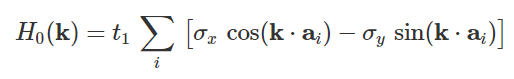

In [9]:
from IPython.display import Image
print("Haldane Hamiltonian Results in a chern number of 1.0")
Image(filename="haldane_ham.png")

In [10]:
#get topology of Haldane model as a test, Haldane model results placed in Yaehmop like output file to test functions
chern_, z2_ = tim.get_topology("haldane_output.OUT")
print("chern number ",chern_)


+----------------------------------------------------------------------+
|===================                                                   |
|SURFACE CALCULATION                                                   |
|===================                                                   |
|starting at 2021-07-29 10:33:46,397                                   |
|running Z2Pack version 2.1.1                                          |
|                                                                      |
|gap_tol:            0.3                                               |
|init_result:        None                                              |
|iterator:           range(10, 27)                                     |
|load:               False                                             |
|load_quiet:         True                                              |
|min_neighbour_dist: 0.01                                              |
|move_tol:           None                         

# Using interface to detect topologically non-trivial materials from POSCAR files

In [13]:
input_POSCAR="FILENAME"

# kpoints=tim.generate_kpoints(nkx=10,nky=10,nkz=10,max_kx=1,max_ky=1)

# #unknown fxns
# input_yaehmop_filename=yaehmop_tools.create_yaehmop_from_poscar(input_POSCAR,kpoints)
# output_yaehmop_filename=yaehmop_tools.run_yaehmop(input_yaehmop_filename) #subprocess.call("bind "+input_yaehmop_filname)

#get topology of Yaehmop output file structure

output_yaehmop_filename="mp-47.OUT"
c_,z2_= tim.get_topology(output_yaehmop_filename)
print(c_)
print(z2_)

AxisError: axis 1 is out of bounds for array of dimension 1